In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
# prep for double exponential fits
def double_exp(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)
def triple_exp(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * np.exp(d * x) + e * np.exp(f * x)

# Correlation Propagator

In [3]:
correlations = np.genfromtxt("correlation_to_equal_time.csv", delimiter=",")
average = correlations.mean(axis=1)
sem = stats.sem(correlations, axis=1)
average_to_max = average[0:np.argmax(average)]
sem_to_max = sem[0:np.argmax(average)]
# Adjust the following line for each system to make everything ns.
taus = np.arange(1,np.argmax(average)+1)/10


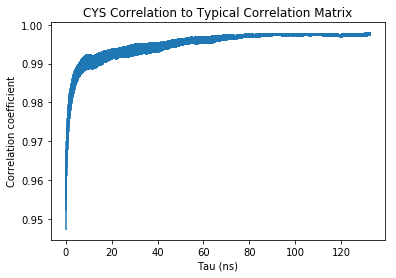

In [4]:
plt.errorbar(taus, average_to_max, sem_to_max)
plt.title('CYS Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('Cys_prop_max_correlation_to_equaltime.png')

Bars are standard error

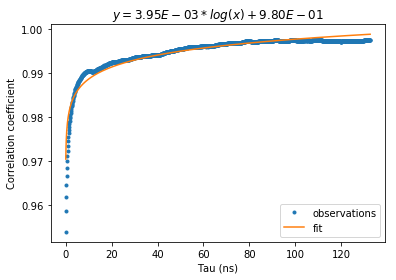

In [5]:
fit = np.polyfit(np.log(taus), average_to_max, 1)
yhat = fit[0]*np.log(taus) + fit[1]
plt.plot(taus, average_to_max, '.', taus, yhat, '-')
plt.title('$y = {0:1.2E}*log(x) + {1:1.2E}$'.format(fit[0], fit[1]))
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_CYS_prop_max_correlation_to_equaltime.png')

[ -3.01202043e-02  -3.82159051e-01   9.92104845e-01   5.14743040e-05]


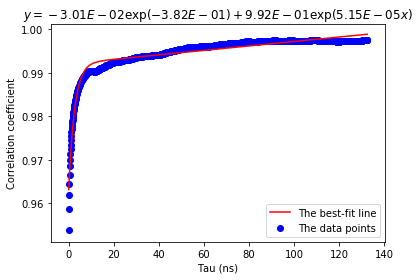

In [6]:
popt, pcov = curve_fit(double_exp,taus,average_to_max,p0=(-.031,-.6,.99,.000046),maxfev=10000)
print(popt)
curvey = double_exp(taus,popt[0],popt[1], popt[2], popt[3]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.title("$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x)$".format(popt[0],popt[1], popt[2], popt[3]))
plt.show()
plt.savefig('doubleFIT_CYS_prop_max_correlation_to_equaltime.png')

[ -3.14183644e-02  -6.65955818e-01  -1.68545427e-02  -1.71231913e-02
   1.00482179e+00  -4.37345801e-05]


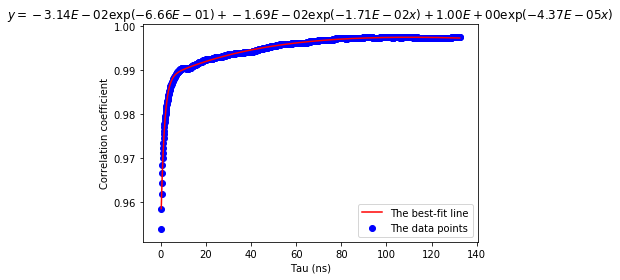

In [7]:
popt, pcov = curve_fit(triple_exp,taus,average_to_max,p0=(-30.7,0.0017,38,.0017,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(taus,popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.title(
    "$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x) + {4:1.2E} \exp({5:1.2E}x)$".format(
        popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]))
plt.show()
plt.show()
plt.savefig('tripleFIT_CYS_prop_max_correlation_to_equaltime.png')

# Time Lagged

In [8]:
TLcorrelations = np.genfromtxt("TLcorrelation_to_equal_time.csv", delimiter=",")
TLaverage = TLcorrelations.mean(axis=1)
TLsem = stats.sem(TLcorrelations, axis=1)
# Adjust the following line for each system to make everything ns.
TLtaus = np.arange(1,len(TLaverage)+1)/10

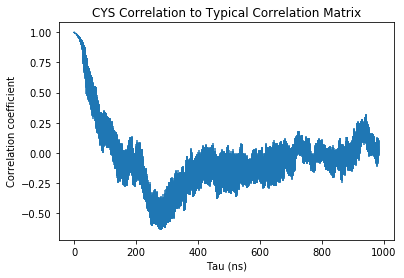

In [9]:
plt.errorbar(TLtaus, TLaverage, TLsem)
plt.title('CYS Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('Cys_TL_correlation_to_equaltime.png')

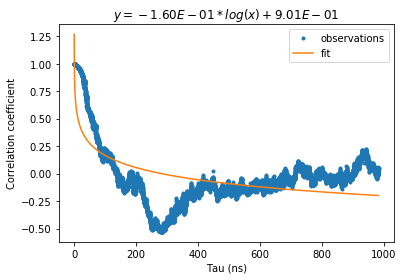

In [10]:
fit = np.polyfit(np.log(TLtaus), TLaverage, 1)
yhat = fit[0]*np.log(TLtaus) + fit[1]
plt.plot(TLtaus, TLaverage, '.', TLtaus, yhat, '-')
plt.title('$y = {0:1.2E}*log(x) + {1:1.2E}$'.format(fit[0], fit[1]))
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_CYS_TL_correlation_to_equaltime.png')

[  4.01992105e+02  -6.23173685e-03  -4.00750611e+02  -6.20710426e-03]


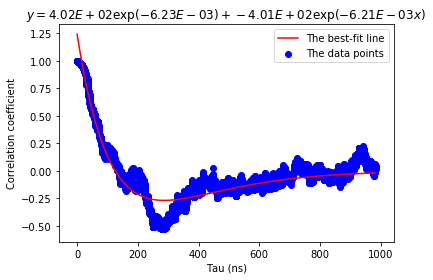

In [11]:
popt, pcov = curve_fit(double_exp,TLtaus,TLaverage,p0=(3.9,-0.0061,-3.89,-.00061),maxfev=10000)
print(popt)
curvey = double_exp(TLtaus,popt[0],popt[1],popt[2],popt[3]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.title("$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x)$".format(popt[0],popt[1], popt[2], popt[3]))
plt.show()
plt.savefig('doubleFIT_CYS_TL_correlation_to_equaltime.png')

[  1.18626710e+03  -3.95181282e-03  -2.11269015e+03  -3.85532015e-03
   9.27598099e+02  -3.74318325e-03]


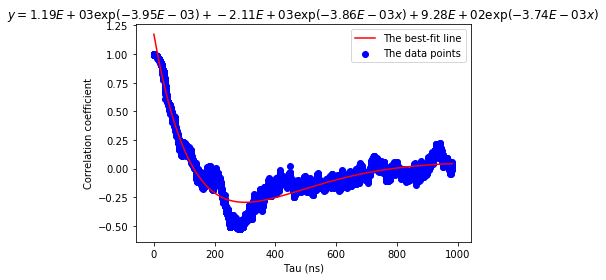

In [12]:
popt, pcov = curve_fit(triple_exp,TLtaus,TLaverage,p0=(3.9,-0.0061,-3.89,-.00061,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(TLtaus,popt[0],popt[1],popt[2],popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.title(
    "$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x) + {4:1.2E} \exp({5:1.2E}x)$".format(
        popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]))
plt.show()
plt.savefig('tripleFIT_CYS_TL_correlation_to_equaltime.png')